In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('balls.csv', sep=';', encoding='Windows-1251')

In [4]:
df

,названия,соответствие,запоминаемость,благозвучие,понятность,оригинальность,привлекательность,выразительность
0,Ювелирные узоры,5,4,4,4,4,4,1
1,Золото Руси,4,4,4,4,4,2,1
2,Ювелирная мелодия,5,4,5,4,5,5,1
3,Российский ювелир,5,2,3,5,1,1,0
4,Ларец,4,4,5,4,4,4,5
5,Ювелирный ряд,3,3,4,4,4,4,4
6,Ювелирница,5,5,5,5,5,5,1
7,Ювелирное раздолье,5,3,5,5,5,4,4
8,Золотые ряды,3,3,4,4,4,4,4
9,Ювелиро,4,5,4,4,5,4,0


In [5]:
df['sum'] = df.loc[:, 'соответствие':'выразительность'].sum(axis=1)

In [6]:
df

,названия,соответствие,запоминаемость,благозвучие,понятность,оригинальность,привлекательность,выразительность,sum
0,Ювелирные узоры,5,4,4,4,4,4,1,26
1,Золото Руси,4,4,4,4,4,2,1,23
2,Ювелирная мелодия,5,4,5,4,5,5,1,29
3,Российский ювелир,5,2,3,5,1,1,0,17
4,Ларец,4,4,5,4,4,4,5,30
5,Ювелирный ряд,3,3,4,4,4,4,4,26
6,Ювелирница,5,5,5,5,5,5,1,31
7,Ювелирное раздолье,5,3,5,5,5,4,4,31
8,Золотые ряды,3,3,4,4,4,4,4,26
9,Ювелиро,4,5,4,4,5,4,0,26


In [7]:
df['label'] = 0

In [8]:
for j in df['sum'].index.tolist():
    if (df['sum'][j]<=10):
      df['label'][j] = 0
    elif (df['sum'][j] > 10) & (df['sum'][j] <=20):
      df['label'][j]  = 1
    elif (df['sum'][j]>20) & (df['sum'][j]<=30):
      df['label'][j]  = 2
    else: 
      df['label'][j] = 3


<ipython-input-8-8f311e132989>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][j]  = 2
<ipython-input-8-8f311e132989>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][j]  = 1
<ipython-input-8-8f311e132989>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][j] = 3


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(list(df['названия']))

vecname = vectorizer.transform(df['названия']).toarray()

In [10]:
df['vecname'] = 0

In [11]:
df['vecname'] = vecname

In [12]:
from sklearn.cluster import KMeans

k = 4
km = KMeans(n_clusters=k, random_state=1)
km.fit(df.drop('названия', 1))
labels=km.labels_

df['claster'] = km.labels_

<ipython-input-12-116bd17e9bec>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  km.fit(df.drop('названия', 1))


In [13]:
df

,названия,соответствие,запоминаемость,благозвучие,понятность,оригинальность,привлекательность,выразительность,sum,label,vecname,claster
0,Ювелирные узоры,5,4,4,4,4,4,1,26,2,0.0,0
1,Золото Руси,4,4,4,4,4,2,1,23,2,0.0,0
2,Ювелирная мелодия,5,4,5,4,5,5,1,29,2,0.0,2
3,Российский ювелир,5,2,3,5,1,1,0,17,1,0.0,3
4,Ларец,4,4,5,4,4,4,5,30,2,0.0,2
5,Ювелирный ряд,3,3,4,4,4,4,4,26,2,0.0,0
6,Ювелирница,5,5,5,5,5,5,1,31,3,0.0,2
7,Ювелирное раздолье,5,3,5,5,5,4,4,31,3,0.0,2
8,Золотые ряды,3,3,4,4,4,4,4,26,2,0.0,0
9,Ювелиро,4,5,4,4,5,4,0,26,2,0.0,0


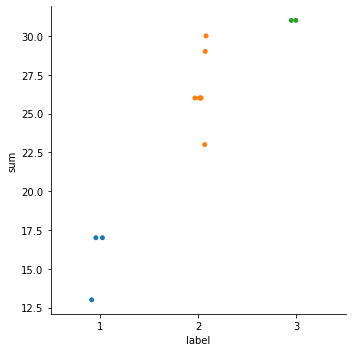

In [14]:
import seaborn as sns

sns.catplot(x='label',
            y='sum',
            data=df);

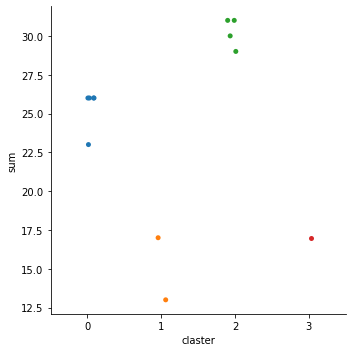

In [15]:
sns.catplot(x='claster',
            y='sum',
            data=df);

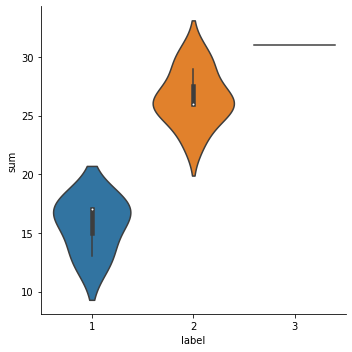

In [16]:
sns.catplot(x='label',
            y='sum',
            kind='violin',
            data=df);

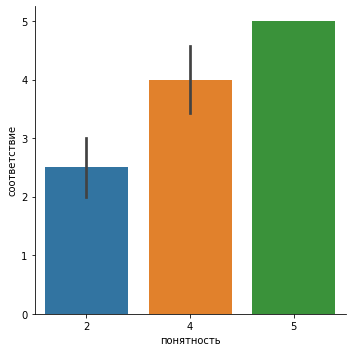

In [17]:
sns.catplot(x='понятность',
            y='соответствие',
            kind='bar',
            data=df);

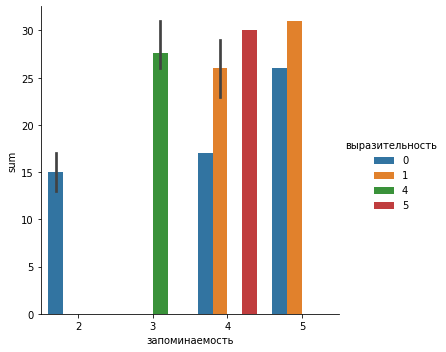

In [18]:
sns.catplot(x='запоминаемость',
            y='sum',
            hue='выразительность',
            kind='bar',
            data=df);

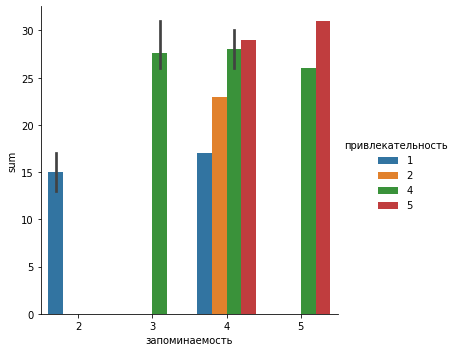

In [19]:
sns.catplot(x='запоминаемость',
            y='sum',
            hue='привлекательность',
            kind='bar',
            data=df);

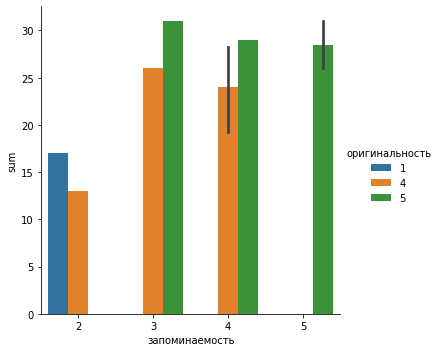

In [20]:
sns.catplot(x='запоминаемость',
            y='sum',
            hue='оригинальность',
            kind='bar',
            data=df);

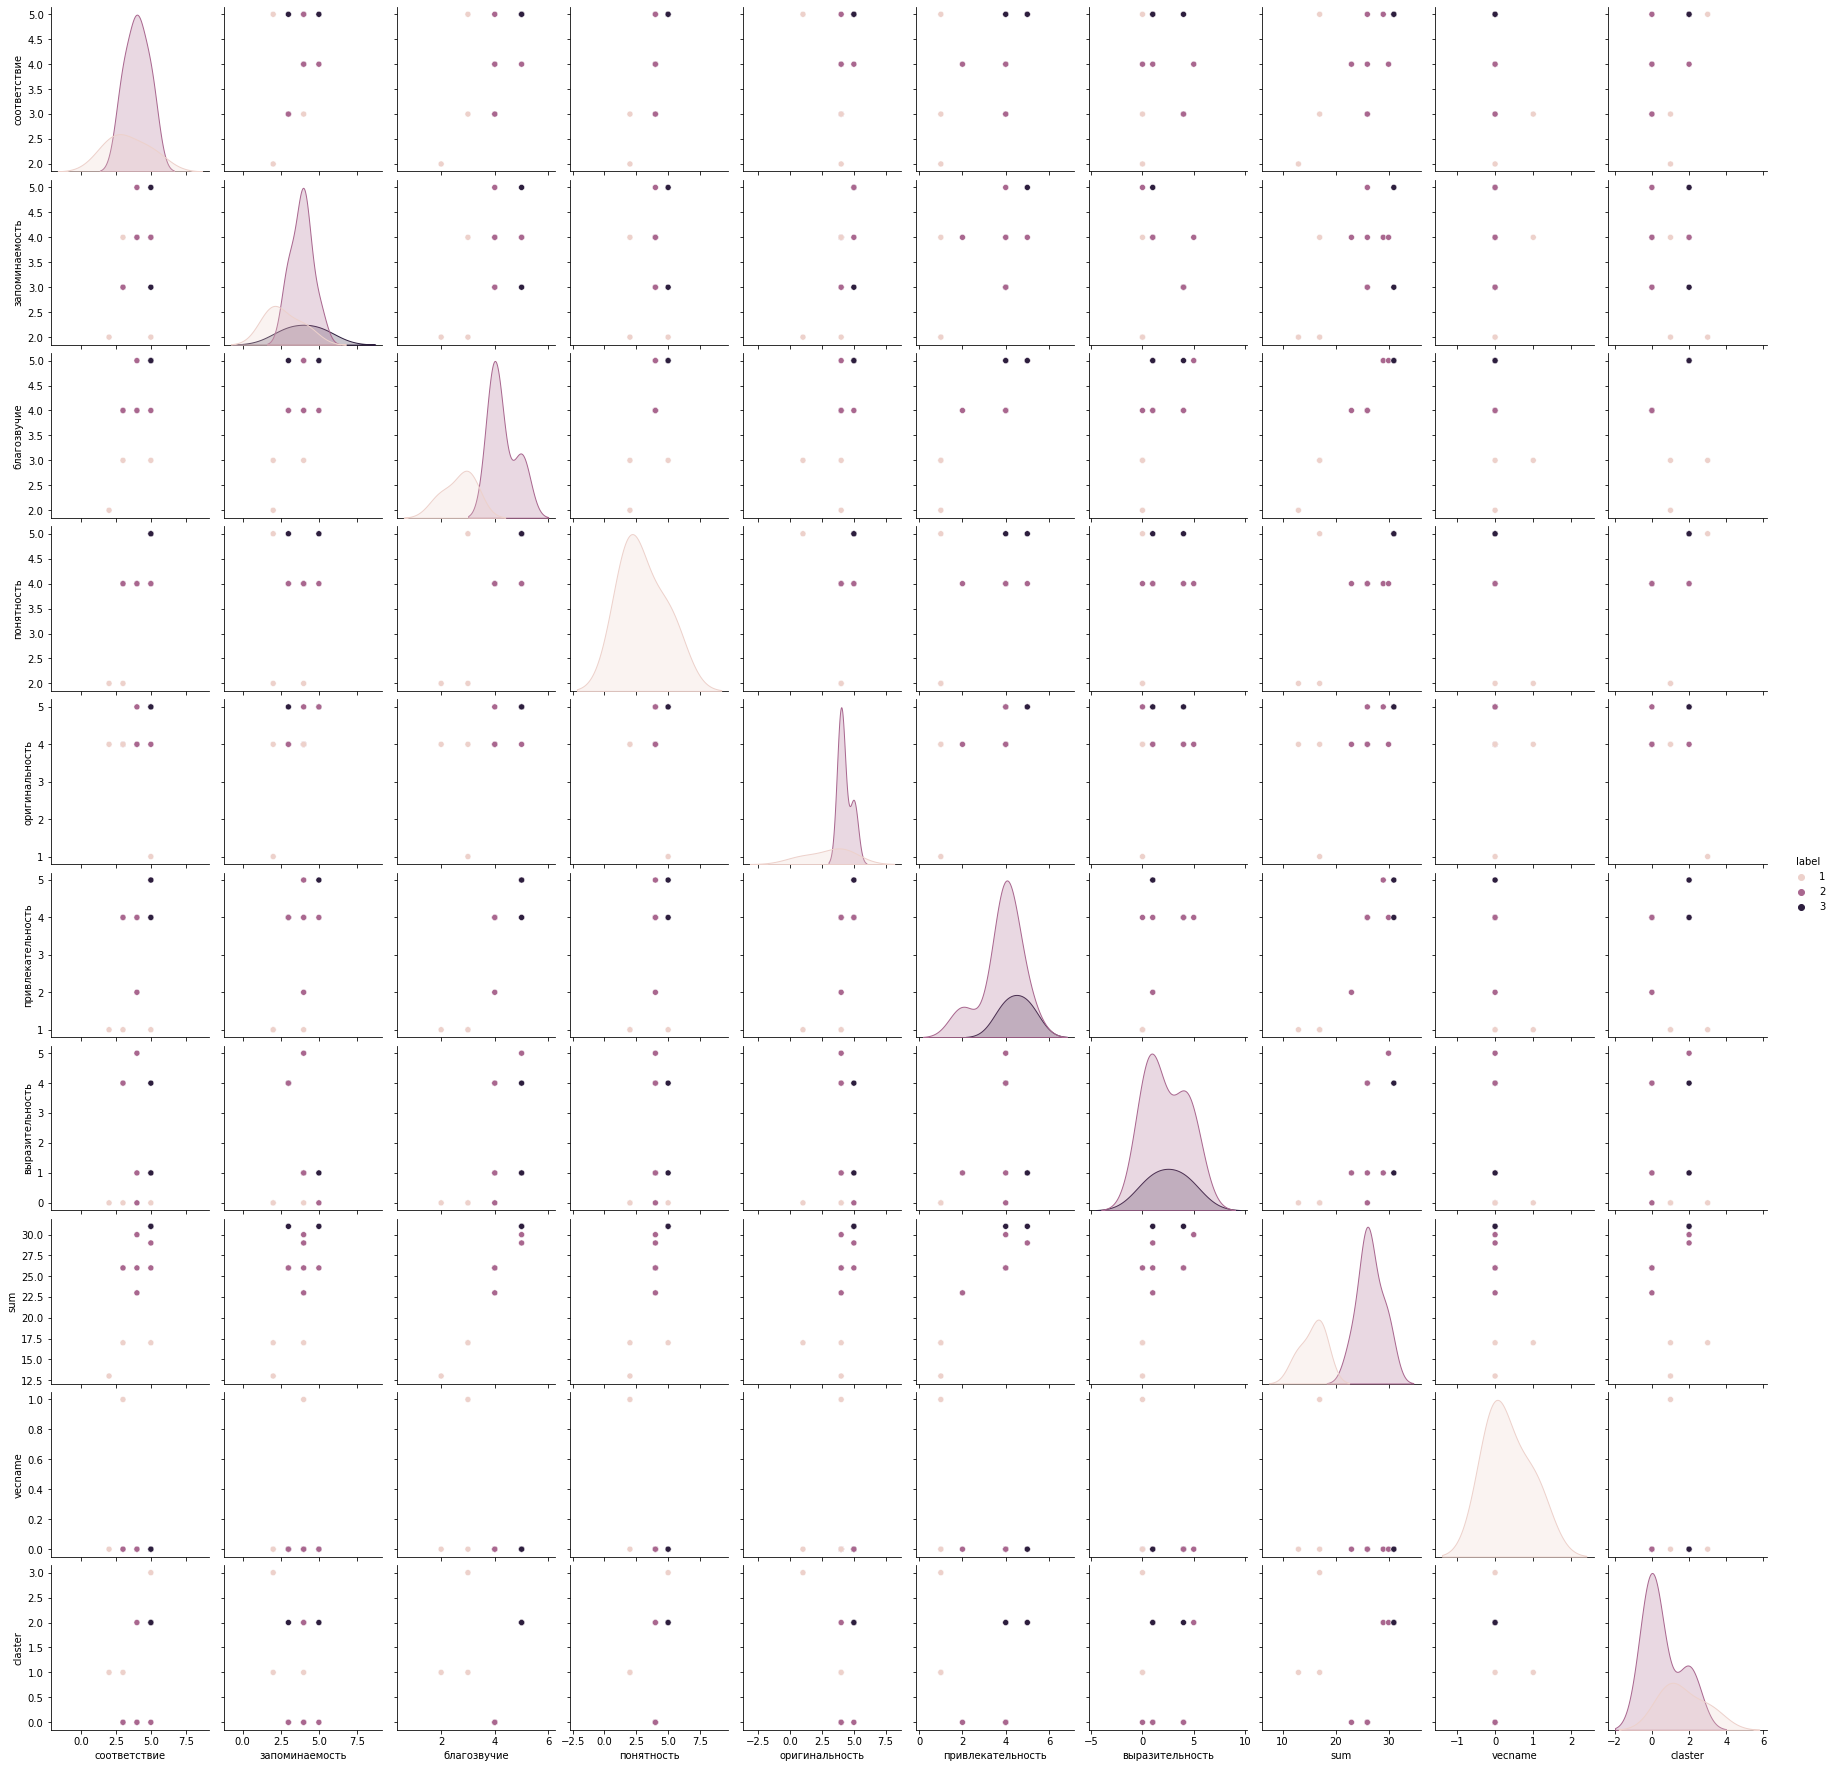

In [21]:
sns.pairplot(df, hue="label")

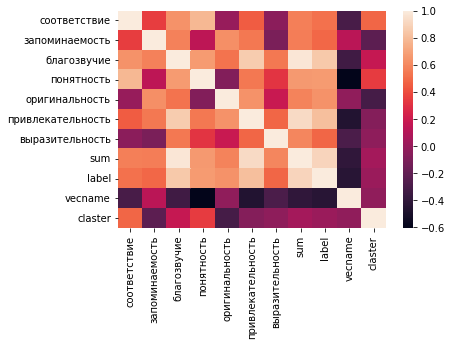

In [22]:
sns.heatmap(df.corr());

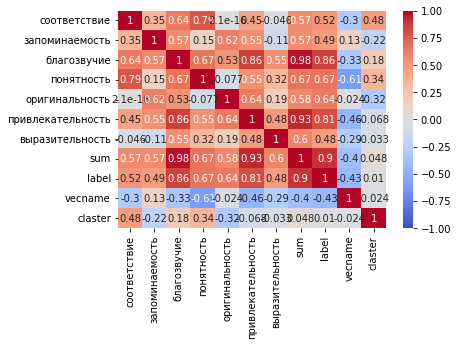

In [23]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

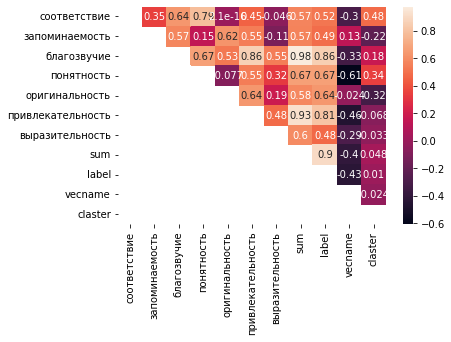

In [24]:
import numpy as np

mask = np.tril(df.corr())
sns.heatmap(df.corr(), annot=True, mask=mask);

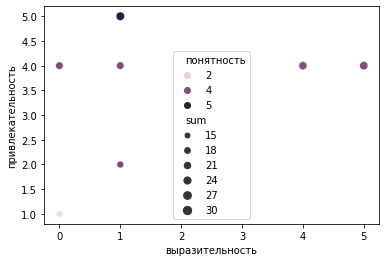

In [25]:
sns.scatterplot(
    data=df, 
    x="выразительность", 
    y="привлекательность", 
    hue="понятность", 
    size="sum"
);

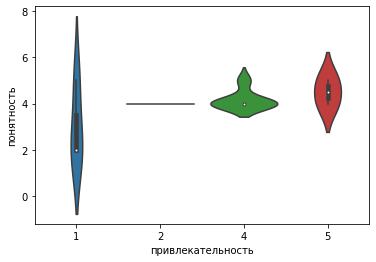

In [26]:
sns.violinplot(x='привлекательность', y='понятность', data=df);

In [27]:
X = df.drop('label', 1)
y = df['label']

<ipython-input-27-12ea56d433a4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('label', 1)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X.drop('названия', 1),
    y, test_size=0.3)

<ipython-input-28-4a1e2aa166a0>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop('названия', 1),


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='ball_tree',leaf_size=30, metric='minkowski', metric_params=None,
n_neighbors=1, p=2, weights='uniform')

knn.fit(X_train, y_train)

pred_knn = knn.predict(X_valid)

In [30]:
from sklearn.metrics import accuracy_score
score_knn = accuracy_score(y_valid, pred_knn)
score_knn

0.75

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets

tree = DecisionTreeClassifier(splitter='best', max_leaf_nodes=10, max_depth=15, 
                              min_samples_split=5, random_state=123)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_valid)

In [32]:
score_tree = accuracy_score(y_valid, pred_tree)
score_tree

1.0

In [33]:
X, y = df[["названия"]], df["label"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) 

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer(ngram_range=(1,2))

X_train_vec = vectorizer.fit_transform(X_train["названия"])
X_test_vec = vectorizer.transform(X_test["названия"])

mnb = MultinomialNB()
mnb.fit(X_train_vec,y_train)
mnb_prediction = mnb.predict(X_test_vec)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


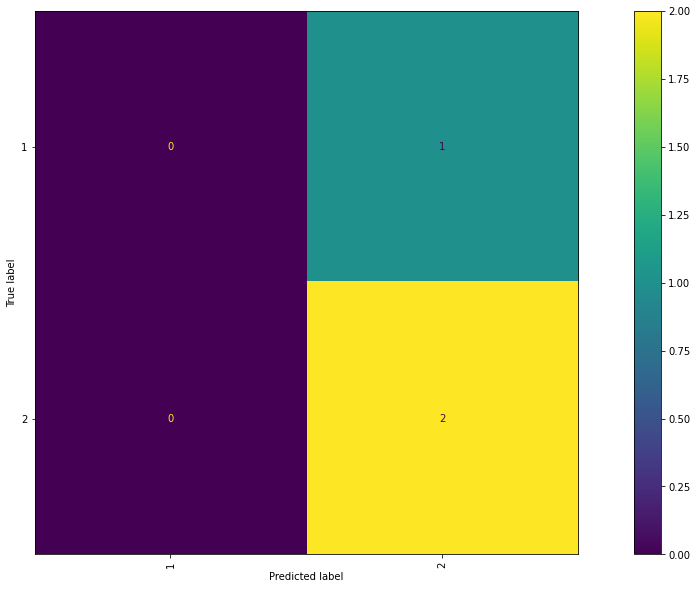

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, plot_confusion_matrix, accuracy_score

#confusion matrix

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
plot_confusion_matrix(mnb, X_test_vec, y_test.values, xticks_rotation="vertical", ax=ax)
plt.show();

In [40]:
print("Class-wise F-1 score is", f1_score(mnb_prediction, y_test.values, average=None))

print("Weighted F-1 score is", f1_score(mnb_prediction, y_test.values, average="weighted"))

Class-wise F-1 score is [0.  0.8]
Weighted F-1 score is 0.8000000000000002


In [41]:
#RoBERTa model

In [43]:
#!pip install simpletransformers

In [45]:
train_df = pd.concat([X_train, y_train], axis=1)
eval_df = pd.concat([X_test, y_test], axis=1)

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df["label"] = encoder.fit_transform(train_df[["label"]])
eval_df["label"] = encoder.transform(eval_df[["label"]])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
from simpletransformers.classification import ClassificationModel

model = ClassificationModel('roberta', 'roberta-base', num_labels=62, use_cuda= False,
                            args={'learning_rate':2e-5, 'num_train_epochs': 20, 'reprocess_input_data': True, 'overwrite_output_dir': True})

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [47]:
model.train_model(train_df)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/9 [00:00<?, ?it/s]

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Running Epoch 0 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 1 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 2 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 3 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 4 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 5 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 6 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 7 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 8 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 9 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 10 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 11 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 12 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 13 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 14 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 15 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 16 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 17 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 18 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 19 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

(40, 2.655416277050972)

In [48]:
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='weighted')
    
result, model_outputs, wrong_predictions = model.eval_model(eval_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
print("Validation Weighted F-1 score:", result["f1"])

Validation Weighted F-1 score: 0.5333333333333333


In [51]:
eval_classes_ohe = pd.get_dummies(np.argmax(model_outputs, axis=1))
test_classes_ohe = pd.get_dummies(eval_df["label"])
## Mean AUC score
print("AUC score ", np.mean(roc_auc_score(test_classes_ohe, eval_classes_ohe, multi_class="ovr", average=None)))

AUC score  0.5
